In [65]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['figure.dpi'] = 70

## EXERCISE 1. 
The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [66]:
xbar = 12.2
mu = 13.2
sigma = 2.5
n = 40
alpha = 0.01

In [67]:
z = (xbar - mu) / (sigma/np.sqrt(n))
z

-2.5298221281347035

In [68]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

In [69]:
print(f"statistic : {z}, pvalue = {p_value}")

statistic : -2.5298221281347035, pvalue = 0.005706018193000826


**<div style =  "color : red">p_value < alpha</div> oldugundan H0 hipotezini reddedip h1 hipotezini kabul ettiğimiz için şirket düşük maaş vermekten suçlanabilir**

## EXERCISE 2.
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [70]:
soil = pd.read_csv("soil - Sheet1.csv")
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [71]:
stats.ttest_ind(soil.Soil1.dropna(), soil.Soil2)

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

**<div style =  "color : red">p_value < alpha</div> oldugundan H0 hipotezini reddedip h1 hipotezini kabul ederiz. Yani kesme durumuna göre alarında fark vardır**

# EXERCISE 3. 
The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [72]:
pisa = pd.read_csv('2015 PISA Test - Sheet1.csv', header=0,  na_filter = False) 
pisa

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NA,74.554202,469.6285,496.9351,496.2424


In [73]:
pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'NA', 'AF'], dtype=object)

In [74]:
pisa[pisa.Continent_Code == "EU"].describe()

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


**Math sütunü için mean<median olduğu için sola carpık**

In [75]:
pisa[pisa.Continent_Code == "AS"].describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


**Math sütunü için mean>median olduğu için sağa carpık**

In [76]:
pisa[pisa.Continent_Code == "SA"].describe()

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


**Math sütunü için mean>median olduğu için saga carpık**

In [77]:
pisa[pisa.Continent_Code == "OC"].describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,86.391704,494.559750,506.085650,511.648700
std,2.589686,0.938401,4.504341,2.340241
min,84.560519,493.896200,502.900600,509.993900
25%,85.476112,494.227975,504.493125,510.821300
50%,86.391704,494.559750,506.085650,511.648700
75%,87.307296,494.891525,507.678175,512.476100
max,88.222889,495.223300,509.270700,513.303500


**Math sütunü için mean=median olduğu için normal distribution**

In [78]:
pisa[pisa.Continent_Code == "NA"].describe()

,internet_users_per_100,Math,Reading,Science
count,5.000000,5.000000,5.000000,5.000000
mean,66.886792,424.250960,446.420920,438.180760
std,14.364359,71.717058,66.614744,76.789918
min,54.215766,327.702000,357.737700,331.638800
25%,57.431043,400.253400,423.276500,415.709900
50%,59.762950,408.023500,427.487500,419.608000
75%,74.554202,469.628500,496.935100,496.242400
max,88.470000,515.647400,526.667800,527.704700


**Math sütunü için mean<median olduğu için sola carpık**

In [79]:
pisa[pisa.Continent_Code == "AF"].describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,43.359918,363.212100,355.457400,381.074250
std,7.297226,5.099513,7.916909,7.536556
min,38.200000,359.606200,349.859300,375.745100
25%,40.779959,361.409150,352.658350,378.409675
50%,43.359918,363.212100,355.457400,381.074250
75%,45.939877,365.015050,358.256450,383.738825
max,48.519836,366.818000,361.055500,386.403400


**Math sütunü için mean=median olduğu için normal distribution**

In [80]:
pisa_math = pisa[pisa.Continent_Code.isin(["EU", "AS"])][["Continent_Code", "Math"]]
pisa_math.head()

,Continent_Code,Math
0,EU,413.1570
1,AS,427.4827
4,EU,496.7423
5,EU,506.9844
6,EU,441.1899


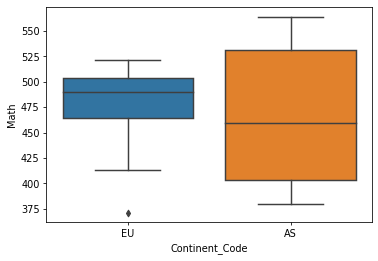

In [81]:
sns.boxplot(y = pisa_math.Math, x = pisa_math.Continent_Code);

In [82]:
stats.ttest_ind(pisa_math[pisa_math.Continent_Code == "EU"].Math, pisa_math[pisa_math.Continent_Code == "AS"].Math)

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

**<div style =  "color : red">p_value > alpha</div> oldugundan H0 hipotezini reddemeyiz. Aralarında ortalama olarak bir fark yoktur**

# EXERCISE 4.  
A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test.  Weight Dataset

CHECK: statistic=2.67808348404993, pvalue=0.00900646517506627

In [83]:
weight = pd.read_csv("weight - Sheet1.csv")
weight = weight.loc[:, ~weight.columns.str.contains('^Unnamed')]
weight.dropna(inplace = True)
weight

,ID,starting,ending
0,1.0,76.0,72.0
1,2.0,81.0,82.0
2,3.0,86.0,84.0
3,4.0,71.0,71.0
4,5.0,88.0,83.0
5,6.0,78.0,74.0
6,7.0,76.0,70.0
7,8.0,81.0,80.0
8,9.0,79.0,78.0
9,10.0,77.0,79.0


In [84]:
stats.ttest_rel(weight.starting, weight.ending, alternative="greater")

Ttest_relResult(statistic=2.6780834840499255, pvalue=0.00900646517506626)

**<div style =  "color : red">p_value < alpha</div> oldugundan H0 hipotezini reddetip H1 hipotezini kabul edıyoruz. Yani 2 zaman durumunda da müşterilerin kilo verdiğini söyleyebiliriz.**